In [74]:
import pandas as pd
import statsmodels.api as sm

In [75]:
dataset_path = "../datasets/ENB2012_data.xlsx"
df = pd.read_excel(dataset_path)

df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [76]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [78]:
data_df = df.iloc[:, :8]
data_df

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [79]:
target_df = df.iloc[:, -2:]
target_df

,Y1,Y2
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28
...,...,...
763,17.88,21.40
764,16.54,16.88
765,16.44,17.11
766,16.48,16.61


In [80]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_df, target_df, random_state=42, train_size=0.8)

print(f"x_train_shape: {x_train.shape}")
print(f"y_train_shape: {y_train.shape}")
print(f"x_test_shape: {x_test.shape}")
print(f"y_test_shape: {y_test.shape}")

x_train_shape: (614, 8)
y_train_shape: (614, 2)
x_test_shape: (154, 8)
y_test_shape: (154, 2)


In [81]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# nlm

In [82]:
from pprint import pprint

lm = sm.OLS.from_formula('Y1 ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8', train_df)
lm_result = lm.fit()
pprint(lm_result.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                     Y1   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     957.3
Date:                Tue, 05 Dec 2023   Prob (F-statistic):          9.39e-323
Time:                        10:39:44   Log-Likelihood:                -1523.5
No. Observations:                 614   AIC:                             3063.
Df Residuals:                     606   BIC:                             3098.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Inte

MAPE for Y1 (X1): 0.35
MAPE for Y2 (X1): 0.27


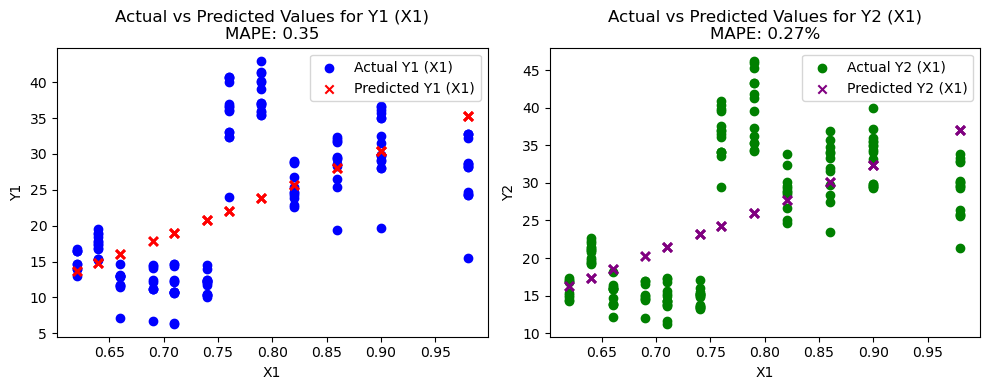

MAPE for Y1 (X2): 0.36
MAPE for Y2 (X2): 0.27


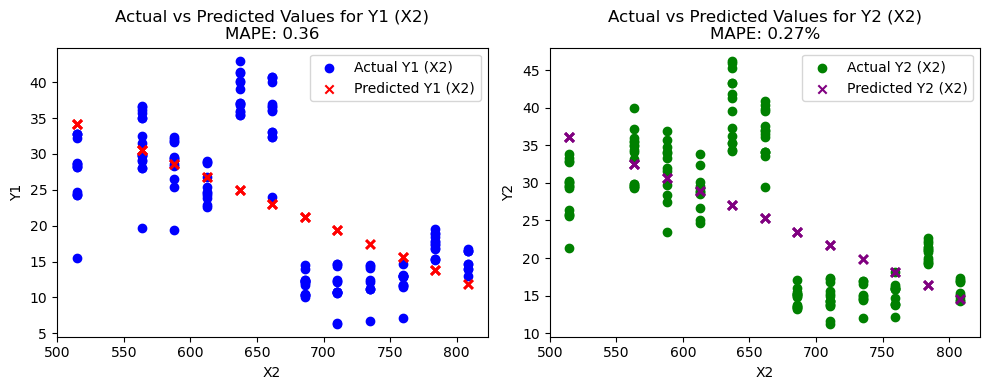

MAPE for Y1 (X3): 0.41
MAPE for Y2 (X3): 0.33


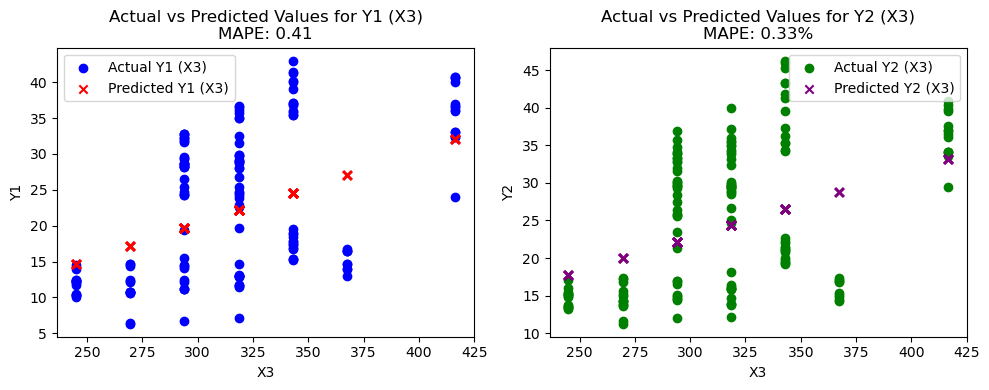

MAPE for Y1 (X4): 0.19
MAPE for Y2 (X4): 0.15


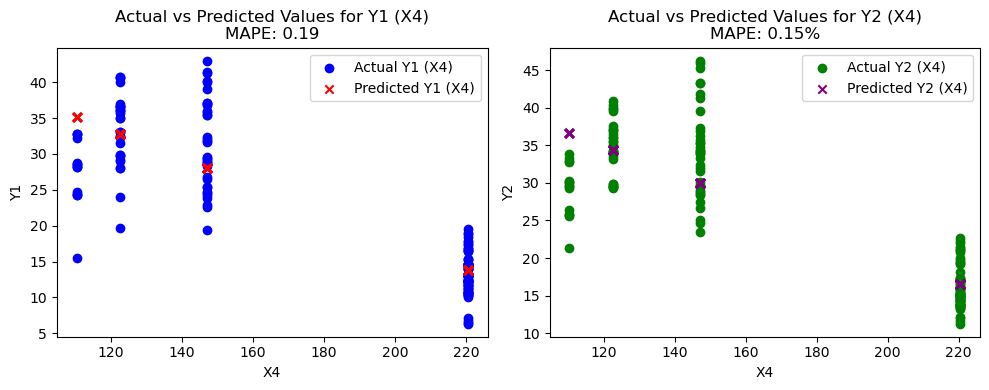

MAPE for Y1 (X5): 0.18
MAPE for Y2 (X5): 0.13


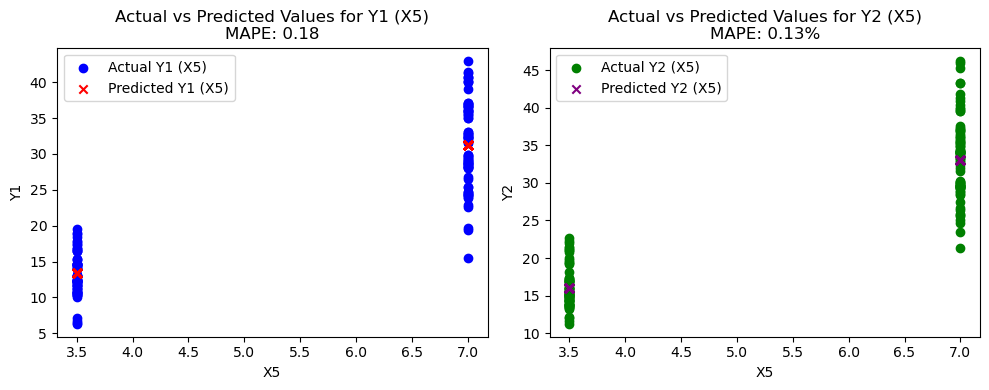

MAPE for Y1 (X6): 0.51
MAPE for Y2 (X6): 0.40


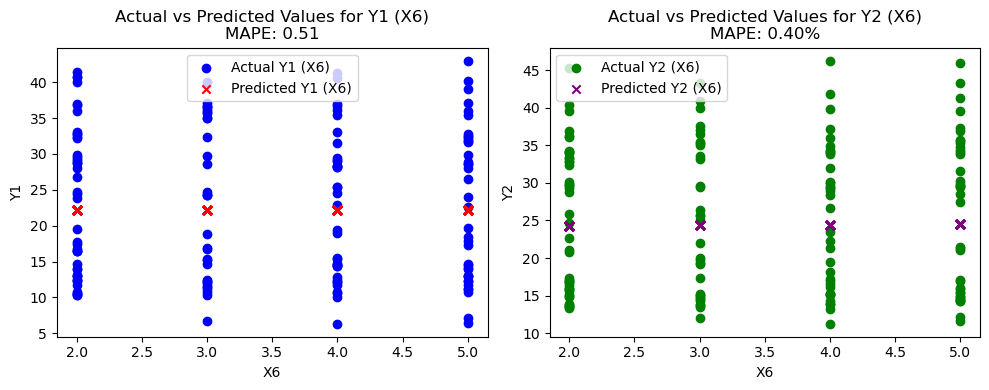

MAPE for Y1 (X7): 0.49
MAPE for Y2 (X7): 0.39


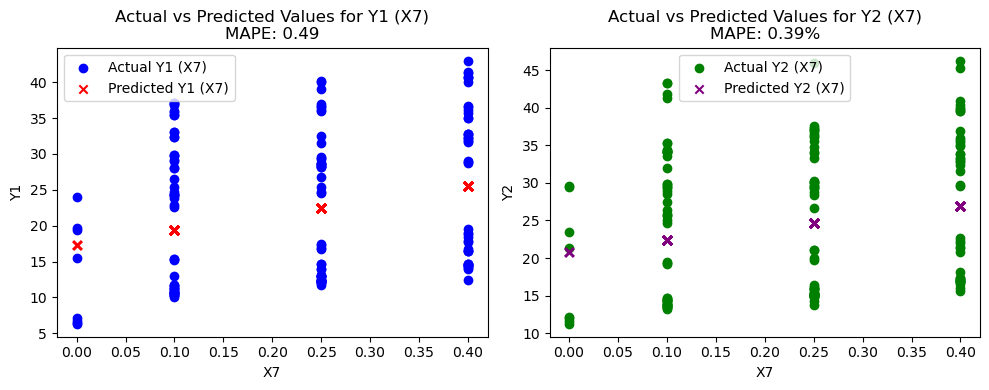

MAPE for Y1 (X8): 0.51
MAPE for Y2 (X8): 0.40


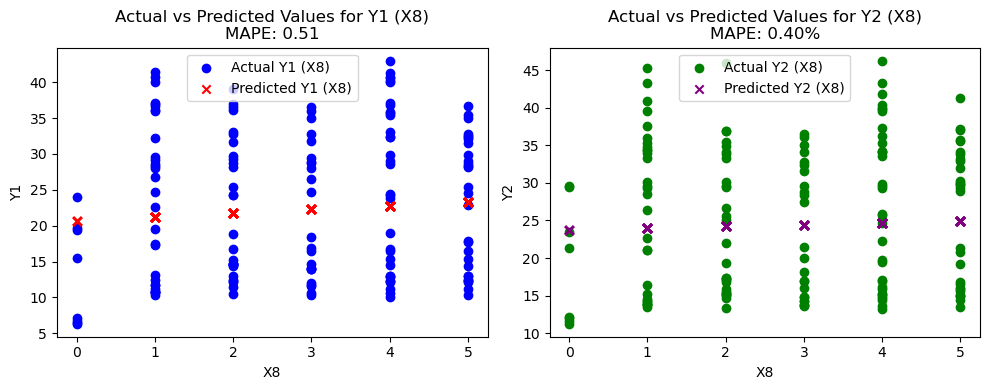

In [83]:
from sklearn.metrics import mean_absolute_percentage_error
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Loop over each feature
for feature in ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']:
    # Linear regression for 'Y1'
    model_y1 = sm.OLS(train_df['Y1'], sm.add_constant(train_df[feature]))
    result_y1 = model_y1.fit()

    y1_predicted = result_y1.predict(sm.add_constant(test_df[feature]))

    mape_y1 = mean_absolute_percentage_error(test_df['Y1'], y1_predicted)
    print(f'MAPE for Y1 ({feature}): {mape_y1:.2f}')

    # Linear regression for 'Y2'
    model_y2 = sm.OLS(train_df['Y2'], sm.add_constant(train_df[feature]))
    result_y2 = model_y2.fit()

    y2_predicted = result_y2.predict(sm.add_constant(test_df[feature]))

    mape_y2 = mean_absolute_percentage_error(test_df['Y2'], y2_predicted)
    print(f'MAPE for Y2 ({feature}): {mape_y2:.2f}')

    # Use subplots for better visualization
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.scatter(test_df[feature], test_df['Y1'], label=f'Actual Y1 ({feature})', color='blue', marker='o')
    plt.scatter(test_df[feature], y1_predicted, label=f'Predicted Y1 ({feature})', color='red', marker='x')
    plt.xlabel(feature)
    plt.ylabel('Y1')
    plt.title(f'Actual vs Predicted Values for Y1 ({feature})\nMAPE: {mape_y1:.2f}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(test_df[feature], test_df['Y2'], label=f'Actual Y2 ({feature})', color='green', marker='o')
    plt.scatter(test_df[feature], y2_predicted, label=f'Predicted Y2 ({feature})', color='purple', marker='x')
    plt.xlabel(feature)
    plt.ylabel('Y2')
    plt.title(f'Actual vs Predicted Values for Y2 ({feature})\nMAPE: {mape_y2:.2f}%')
    plt.legend()

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

# glm

MAPE for Y1 (X1): 0.35
MAPE for Y2 (X1): 0.27


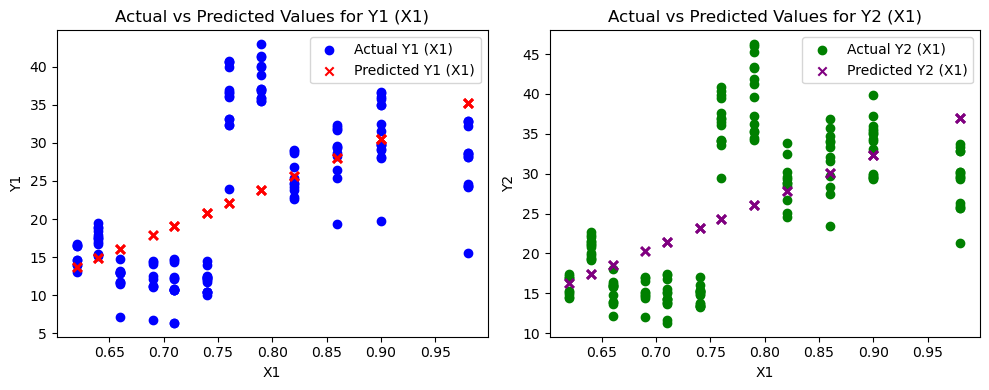

MAPE for Y1 (X2): 0.36
MAPE for Y2 (X2): 0.27


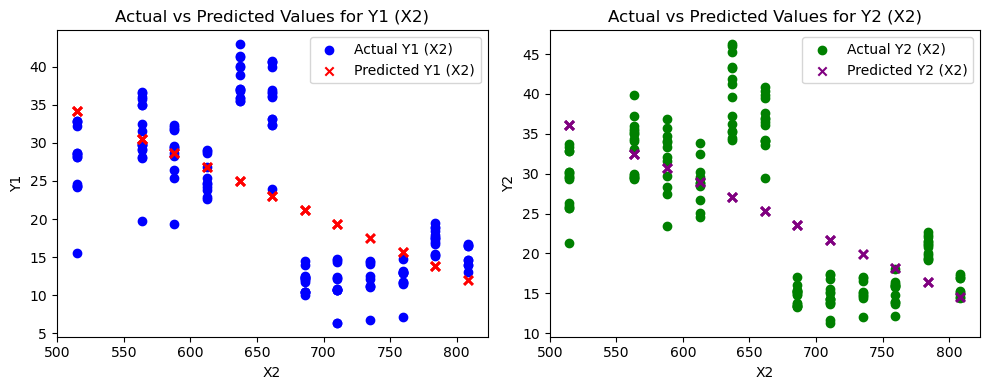

MAPE for Y1 (X3): 0.41
MAPE for Y2 (X3): 0.33


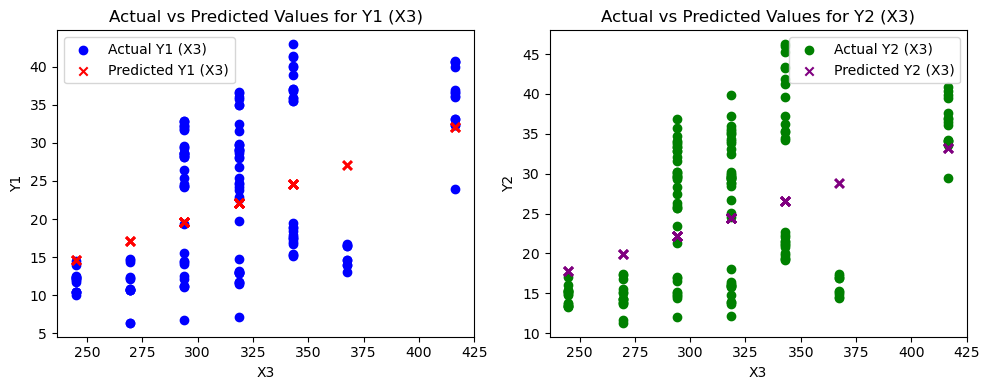

MAPE for Y1 (X4): 0.19
MAPE for Y2 (X4): 0.15


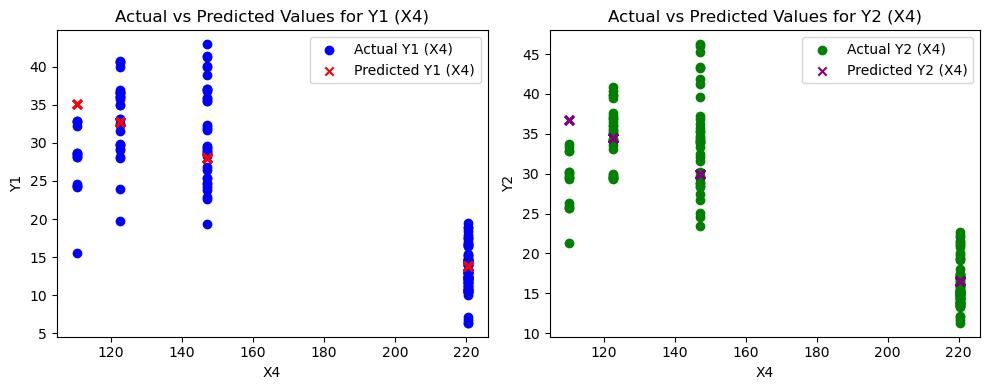

MAPE for Y1 (X5): 0.18
MAPE for Y2 (X5): 0.13


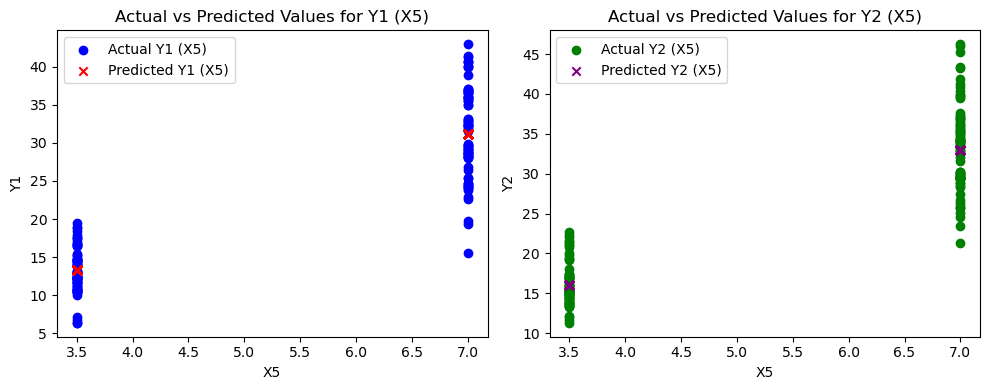

MAPE for Y1 (X6): 0.51
MAPE for Y2 (X6): 0.40


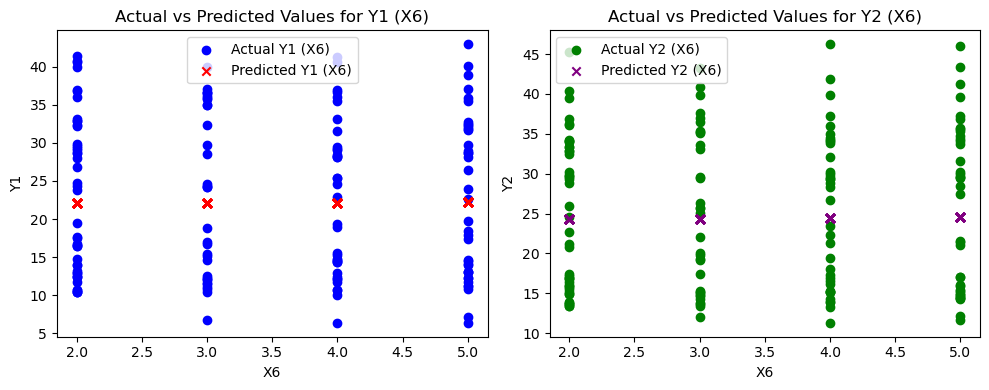

MAPE for Y1 (X7): 0.49
MAPE for Y2 (X7): 0.39


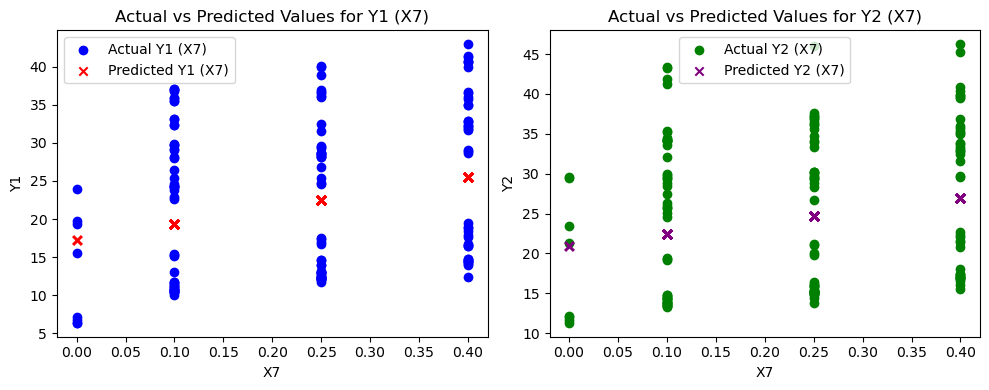

MAPE for Y1 (X8): 0.51
MAPE for Y2 (X8): 0.40


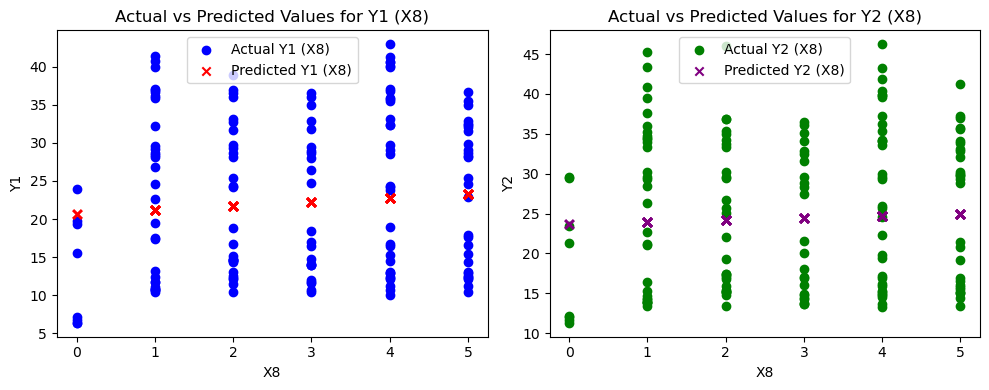

In [84]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

for feature in ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']:
    model_y1 = sm.GLM(train_df['Y1'], sm.add_constant(train_df[feature]), family=sm.families.Gaussian())
    result_y1 = model_y1.fit()

    y1_predicted = result_y1.predict(sm.add_constant(test_df[feature]))
    
    mape_y1 = mean_absolute_percentage_error(test_df['Y1'], y1_predicted)
    print(f'MAPE for Y1 ({feature}): {mape_y1:.2f}')
    
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.scatter(test_df[feature], test_df['Y1'], label=f'Actual Y1 ({feature})', color='blue', marker='o')
    plt.scatter(test_df[feature], y1_predicted, label=f'Predicted Y1 ({feature})', color='red', marker='x')
    plt.xlabel(feature)
    plt.ylabel('Y1')
    plt.title(f'Actual vs Predicted Values for Y1 ({feature})')
    plt.legend()

    model_y2 = sm.GLM(train_df['Y2'], sm.add_constant(train_df[feature]), family=sm.families.Gaussian())
    result_y2 = model_y2.fit()

    y2_predicted = result_y2.predict(sm.add_constant(test_df[feature]))

    mape_y2 = mean_absolute_percentage_error(test_df['Y2'], y2_predicted)
    print(f'MAPE for Y2 ({feature}): {mape_y2:.2f}')

    plt.subplot(1, 2, 2)
    plt.scatter(test_df[feature], test_df['Y2'], label=f'Actual Y2 ({feature})', color='green', marker='o')
    plt.scatter(test_df[feature], y2_predicted, label=f'Predicted Y2 ({feature})', color='purple', marker='x')
    plt.xlabel(feature)
    plt.ylabel('Y2')
    plt.title(f'Actual vs Predicted Values for Y2 ({feature})')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [97]:
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.metrics import mean_squared_error

import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

def show_norms(title, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rms = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    print(f'{title} MAE: {mae:.2f} MAPE: {mape:.2f} MSE: {mse:.2f} RMSE: {rms:.2f} R²: {r2:.2f}')
    print("=============================================================")

for feature in ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']:
    model_y1 = sm.GLM(train_df['Y1'], sm.add_constant(train_df[feature]), family=sm.families.Gaussian())
    result_y1 = model_y1.fit()

    y1_predicted = result_y1.predict(sm.add_constant(test_df[feature]))    
    show_norms(f'Y1({feature})', test_df['Y1'], y1_predicted)
    
    model_y2 = sm.GLM(train_df['Y2'], sm.add_constant(train_df[feature]), family=sm.families.Gaussian())
    result_y2 = model_y2.fit()

    y2_predicted = result_y2.predict(sm.add_constant(test_df[feature]))
    show_norms(f'Y2({feature})', test_df['Y2'], y2_predicted)

Y1(X1) MAE: 6.55 MAPE: 0.35 MSE: 67.72 RMSE: 8.23 R²: 0.35
Y2(X1) MAE: 6.27 MAPE: 0.27 MSE: 59.34 RMSE: 7.70 R²: 0.36
Y1(X2) MAE: 6.46 MAPE: 0.36 MSE: 62.85 RMSE: 7.93 R²: 0.40
Y2(X2) MAE: 6.05 MAPE: 0.27 MSE: 54.42 RMSE: 7.38 R²: 0.41
Y1(X3) MAE: 7.79 MAPE: 0.41 MSE: 77.27 RMSE: 8.79 R²: 0.26
Y2(X3) MAE: 7.41 MAPE: 0.33 MSE: 71.72 RMSE: 8.47 R²: 0.23
Y1(X4) MAE: 3.98 MAPE: 0.19 MSE: 27.95 RMSE: 5.29 R²: 0.73
Y2(X4) MAE: 3.68 MAPE: 0.15 MSE: 25.22 RMSE: 5.02 R²: 0.73
Y1(X5) MAE: 3.64 MAPE: 0.18 MSE: 21.68 RMSE: 4.66 R²: 0.79
Y2(X5) MAE: 3.19 MAPE: 0.13 MSE: 17.90 RMSE: 4.23 R²: 0.81
Y1(X6) MAE: 9.27 MAPE: 0.51 MSE: 104.82 RMSE: 10.24 R²: -0.01
Y2(X6) MAE: 8.74 MAPE: 0.40 MSE: 93.39 RMSE: 9.66 R²: -0.01
Y1(X7) MAE: 9.18 MAPE: 0.49 MSE: 98.62 RMSE: 9.93 R²: 0.05
Y2(X7) MAE: 8.72 MAPE: 0.39 MSE: 90.22 RMSE: 9.50 R²: 0.03
Y1(X8) MAE: 9.20 MAPE: 0.51 MSE: 103.54 RMSE: 10.18 R²: 0.01
Y2(X8) MAE: 8.71 MAPE: 0.40 MSE: 92.93 RMSE: 9.64 R²: -0.00


# nlm

In [85]:
import numpy as np
from scipy.optimize import minimize

x_train, x_test, y_train, y_test = train_test_split(data_df, target_df, random_state=42, train_size=0.8)
X = x_train.to_numpy()
y_true = y_train.to_numpy()

def nonlinear_model(params, x1, x2, x3, x4, x5, x6, x7, x8):
    return np.dot(params, np.array([x1, x2, x3, x4, x5, x6, x7, x8]))


def objective_function(params, x1, x2, x3, x4, x5, x6, x7, x8, y_true):
    y_pred = nonlinear_model(params, x1, x2, x3, x4, x5, x6, x7, x8)
    mse = np.mean((y_pred - y_true) ** 2)
    return mse


initial_params = [0.65, 650., 300, 180., 5, 3, 0.20, 0.5]

bounds = [(0.61, 0.99), (515.00, 809.00),
          (246.00, 417.00), (111.00, 221.00),
          (4.00, 8.00), (1.00, 6.00),
          (0.00, 0.41), (0.00, 5.01)]

result_y1 = minimize(objective_function, initial_params,
                     args=(X[:, 0], X[:, 1], X[:, 2], X[:, 3], X[:, 4], X[:, 5], X[:, 6], X[:, 7], y_true[:, 0]),
                     method='Nelder-Mead', bounds=bounds)
result_y2 = minimize(objective_function, initial_params,
                     args=(X[:, 0], X[:, 1], X[:, 2], X[:, 3], X[:, 4], X[:, 5], X[:, 6], X[:, 7], y_true[:, 1]),
                     method='Nelder-Mead', bounds=bounds)

print("Estimated y1 Parameters:", result_y1.x)
print("y1:", result_y1.fun)
print()
print("Estimated y2 Parameters:", result_y2.x)
print("y2:", result_y2.fun)

Estimated y1 Parameters: [6.10000000e-01 5.15000000e+02 2.46000000e+02 1.11000000e+02
 4.00000000e+00 1.00000000e+00 5.79416970e-09 1.10721319e-11]
y1: 200928753671.12488

Estimated y2 Parameters: [6.10000000e-01 5.15000000e+02 2.46000000e+02 1.11000000e+02
 4.00000000e+00 1.00000000e+00 6.90017509e-11 3.58554125e-10]
y2: 200926729942.90833
